# Real Estate Property Price Prediction Model 

This Multiple Linear Regression Model shall predict the Housing Property Price using multiple features related to Real Estate Properties and shall also use various Error Reduction Techinques to increase the accuracy of the model. 

In [1]:
#Importing the requisite Libraries/Packages:
import pandas as pd
import numpy as np
import seaborn as sbn
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
%matplotlib inline

### Importing the Dataset :

In [2]:
#Reading the .csv data file using pandas into its data structure i.e.'DataFrames':
df=pd.read_csv("Housing.csv")

### Superficial Data Analysis :

In [3]:
#Checking the dimensions of the DataFrame i.e. Number of rows and columns
df.shape

(545, 13)

In [4]:
#Displaying the first 5 rows of our data stored in the DataFrame:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
#Collecting the superficial knowledge of our data calculated over the values present in each column:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
#Inspecting the data for the null values or no-value column:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Matrix Data Analysis :

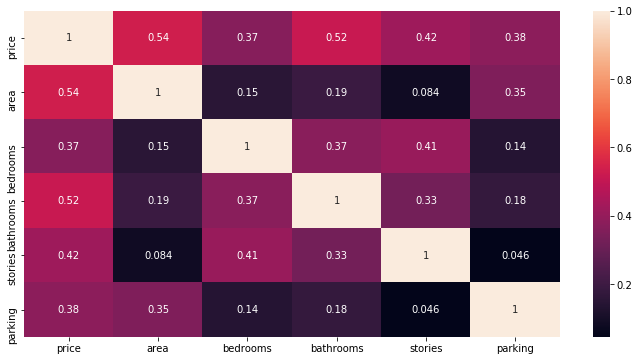

In [7]:
#Seaborn Heatmap to analyse data via Correlation Cofficients: 
plt.figure(figsize=(12,6))
sbn.heatmap(df.corr(), annot=True)

### Graphical Data Analysis :

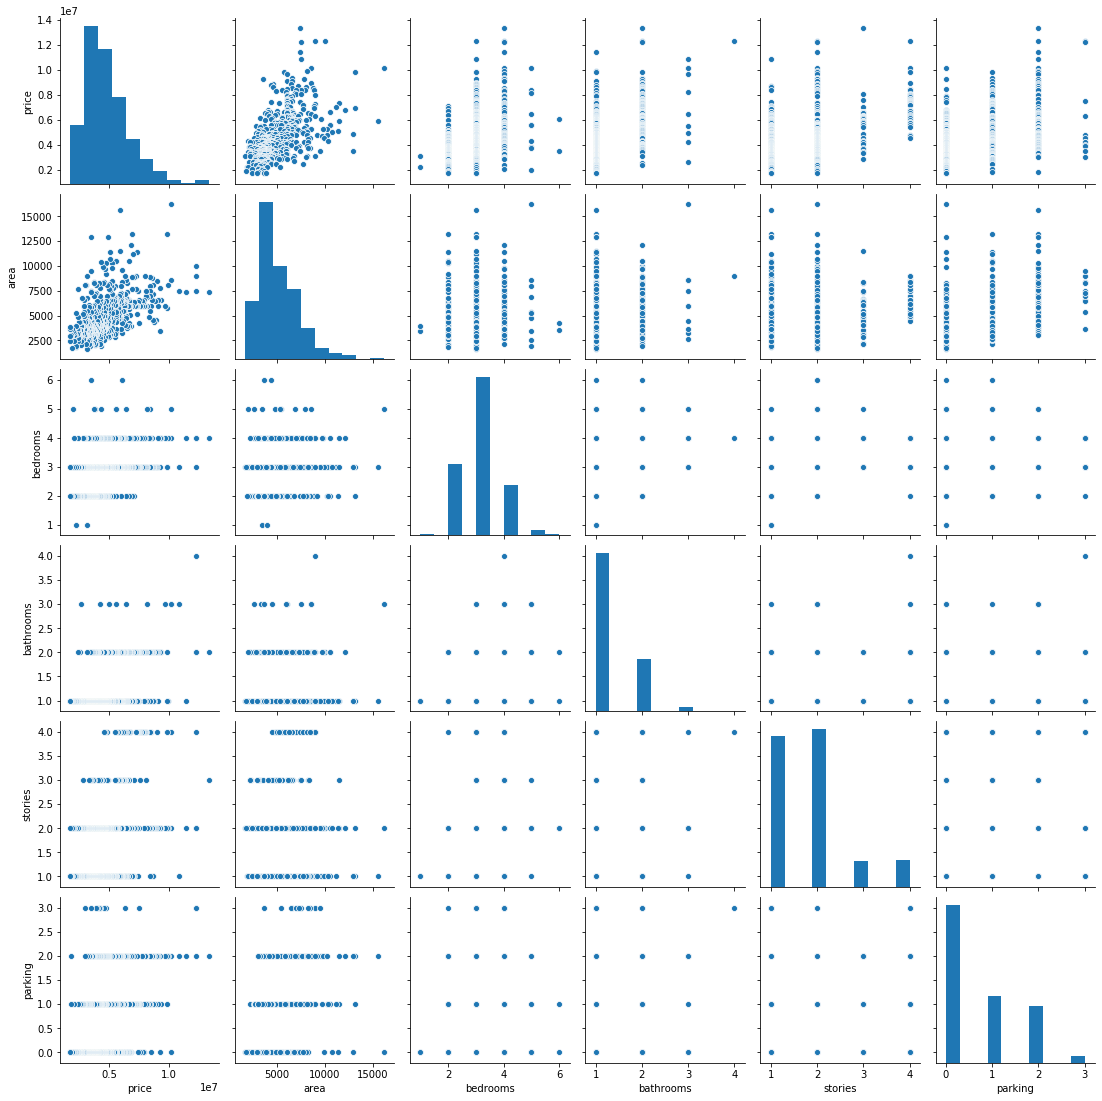

In [8]:
sbn.pairplot(df)
plt.show()

### Outlier Analysis using Boxplots :

Text(0.5, 0, 'Parking')

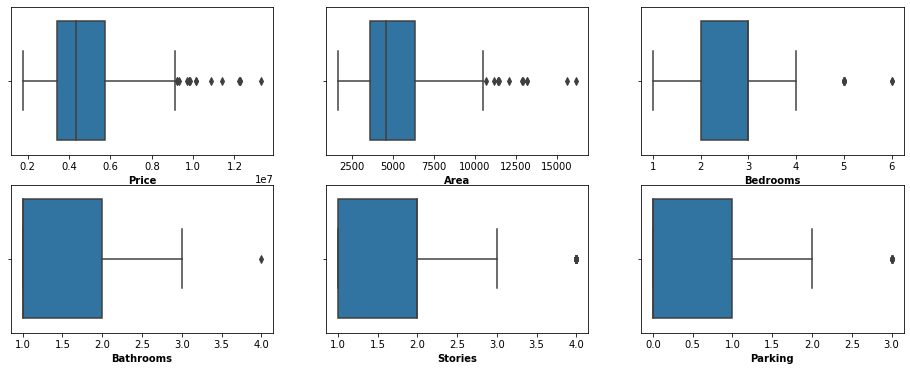

In [155]:
#On the present data we shall apply 'Outlier Analysis' in order to identify the Outliers.
fig,axs=plt.subplots(2,3,figsize=(16,6))
plot1=sbn.boxplot(df['price'],ax=axs[0,0])
plot1.set_xlabel('Price',fontweight='bold',fontsize='10')
plot2=sbn.boxplot(df['area'],ax=axs[0,1])
plot2.set_xlabel('Area',fontweight='bold',fontsize='10')
plot3=sbn.boxplot(df['bedrooms'],ax=axs[0,2])
plot3.set_xlabel('Bedrooms',fontweight='bold',fontsize='10')
plot4=sbn.boxplot(df['bathrooms'],ax=axs[1,0])
plot4.set_xlabel('Bathrooms',fontweight='bold',fontsize='10')
plot5=sbn.boxplot(df['stories'],ax=axs[1,1])
plot5.set_xlabel('Stories',fontweight='bold',fontsize='10')
plot6=sbn.boxplot(df['parking'],ax=axs[1,2])
plot6.set_xlabel('Parking',fontweight='bold',fontsize='10')

### Outlier Treatment :

Text(0.5, 0, 'Outlier-Treated Price')

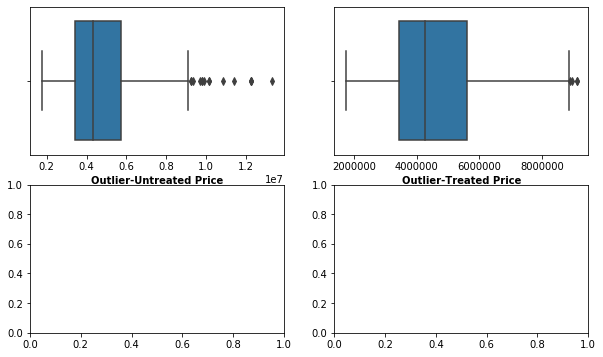

In [9]:
# Outlier treatment for 'Price'.
fig,axs=plt.subplots(2,2,figsize=(10,6))
x1=sbn.boxplot(df['price'],ax=axs[0,0])
x1.set_xlabel('Outlier-Untreated Price',fontweight='bold',fontsize='10')
Q1 = df.price.quantile(0.25)
Q3 = df.price.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.price >= Q1 - 1.5*IQR) & (df.price <= Q3 + 1.5*IQR)]
x2=sbn.boxplot(df['price'],ax=axs[0,1])
x2.set_xlabel('Outlier-Treated Price',fontweight='bold',fontsize='10')

Text(0.5, 0, 'Outlier-Treated Area')

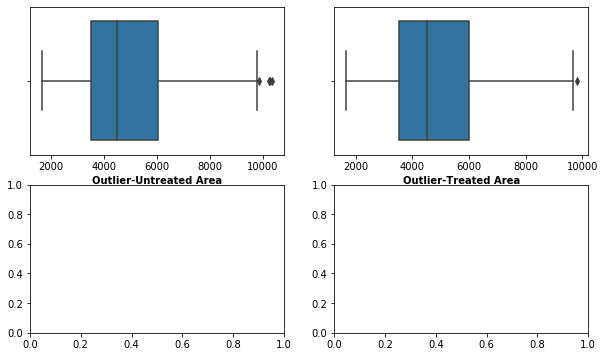

In [11]:
# Outlier treatment for 'Area'.
fig,axs=plt.subplots(2,2,figsize=(10,6))
x3=sbn.boxplot(df['area'],ax=axs[0,0])
x3.set_xlabel('Outlier-Untreated Area',fontweight='bold',fontsize='10')
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
x4=sbn.boxplot(df['area'],ax=axs[0,1])
x4.set_xlabel('Outlier-Treated Area',fontweight='bold',fontsize='10')

Text(0.5, 0, 'Outlier-Treated No. of Bedroom')

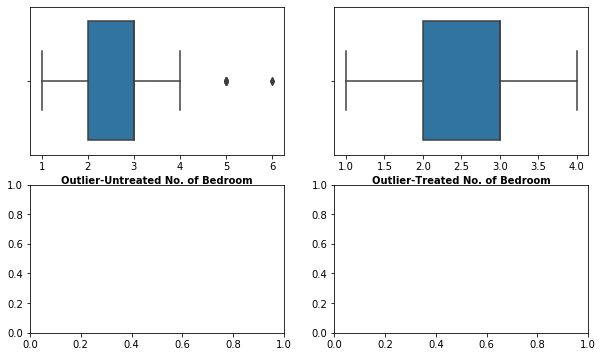

In [12]:
# Outlier treatment for 'Bedrooms'.
fig,axs=plt.subplots(2,2,figsize=(10,6))
x5=sbn.boxplot(df['bedrooms'],ax=axs[0,0])
x5.set_xlabel('Outlier-Untreated No. of Bedroom',fontweight='bold',fontsize='10')
Q1 = df.bedrooms.quantile(0.25)
Q3 = df.bedrooms.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bedrooms >= Q1 - 1.5*IQR) & (df.bedrooms <= Q3 + 1.5*IQR)]
x6=sbn.boxplot(df['bedrooms'],ax=axs[0,1])
x6.set_xlabel('Outlier-Treated No. of Bedroom',fontweight='bold',fontsize='10')

Text(0.5, 0, 'Outlier-Treated No. of Bathroom')

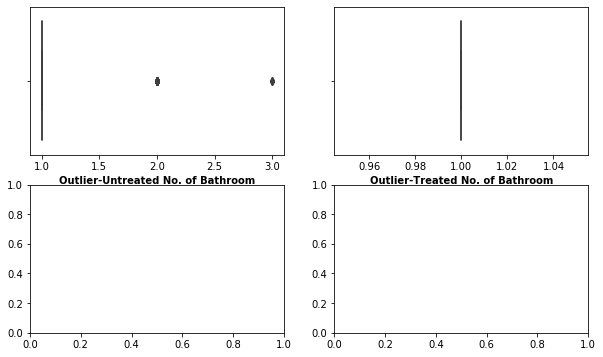

In [13]:
# Outlier treatment for 'Bathrooms'.
fig,axs=plt.subplots(2,2,figsize=(10,6))
x7=sbn.boxplot(df['bathrooms'],ax=axs[0,0])
x7.set_xlabel('Outlier-Untreated No. of Bathroom',fontweight='bold',fontsize='10')
Q1 = df.bathrooms.quantile(0.25)
Q3 = df.bathrooms.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.bathrooms >= Q1 - 1.5*IQR) & (df.bathrooms <= Q3 + 1.5*IQR)]
x8=sbn.boxplot(df['bathrooms'],ax=axs[0,1])
x8.set_xlabel('Outlier-Treated No. of Bathroom',fontweight='bold',fontsize='10')

Text(0.5, 0, 'Outlier-Treated No. of Stories')

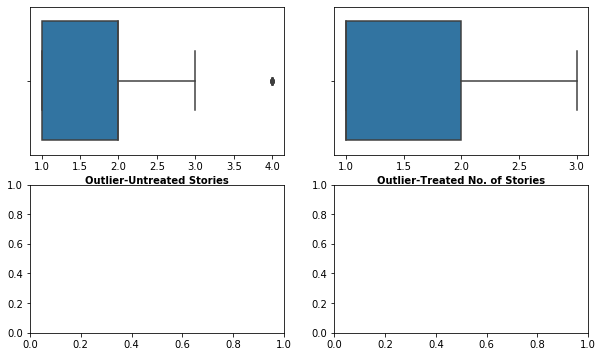

In [14]:
# Outlier treatment for 'Stories'.
fig,axs=plt.subplots(2,2,figsize=(10,6))
x7=sbn.boxplot(df['stories'],ax=axs[0,0])
x7.set_xlabel('Outlier-Untreated Stories',fontweight='bold',fontsize='10')
Q1 = df.stories.quantile(0.25)
Q3 = df.stories.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.stories >= Q1 - 1.5*IQR) & (df.stories <= Q3 + 1.5*IQR)]
x8=sbn.boxplot(df['stories'],ax=axs[0,1])
x8.set_xlabel('Outlier-Treated No. of Stories',fontweight='bold',fontsize='10')

### Comparitive Feature Boxplots:

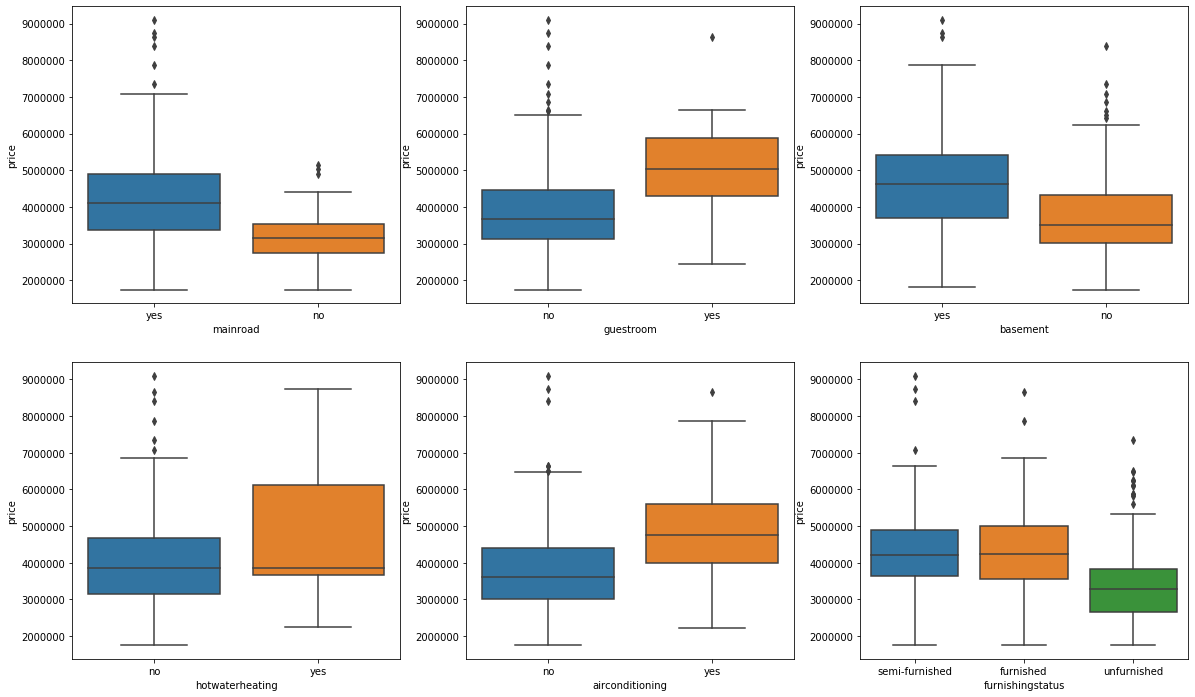

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sbn.boxplot(x = 'mainroad', y = 'price', data = df)
plt.subplot(2,3,2)
sbn.boxplot(x = 'guestroom', y = 'price', data = df)
plt.subplot(2,3,3)
sbn.boxplot(x = 'basement', y = 'price', data = df)
plt.subplot(2,3,4)
sbn.boxplot(x = 'hotwaterheating', y = 'price', data = df)
plt.subplot(2,3,5)
sbn.boxplot(x = 'airconditioning', y = 'price', data = df)
plt.subplot(2,3,6)
sbn.boxplot(x = 'furnishingstatus', y = 'price', data = df)
plt.show()

### Binary Encoding :

In [16]:
#Linear Encoding(Converting the Non-Numeric Attributes into Numeric types):
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
def binary_map(x):
    return x.map({'yes': 1, "no": 0})
df[varlist] = df[varlist].apply(binary_map)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished
40,7875000,6550,3,1,2,1,0,1,0,1,0,1,furnished


### One-Hot Encoding :

In [17]:
#Only 'furnishingstatus' is left in non-numeric attribute type.So we shall be using 'One-Hot Encoding technique':
status = pd.get_dummies(df['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
15,0,1,0
20,0,1,0
22,1,0,0
27,0,1,0
40,1,0,0


In [18]:
status = pd.get_dummies(df['furnishingstatus'], drop_first = True)
df= pd.concat([df,status], axis = 1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,semi-furnished,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,semi-furnished,1,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished,0,0
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,semi-furnished,1,0
40,7875000,6550,3,1,2,1,0,1,0,1,0,1,furnished,0,0


In [19]:
df.drop(['furnishingstatus'], axis = 1, inplace = True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,1,0
20,8750000,4320,3,1,2,1,0,1,1,0,2,0,1,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,0,0
27,8400000,8875,3,1,1,1,0,0,0,0,1,0,1,0
40,7875000,6550,3,1,2,1,0,1,0,1,0,1,0,0


In [20]:

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler = MinMaxScaler()
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\Vaibhav Gupta\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Vaibhav Gupta\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
406,0.233333,0.457071,0.333333,0.0,0.0,1,0,0,0,0,0.333333,1,0,1
362,0.266667,0.296717,0.333333,0.0,0.0,1,0,0,0,0,0.000000,0,0,0
503,0.123810,0.290404,0.666667,0.0,0.0,1,0,0,0,0,0.000000,0,1,0
80,0.663810,0.542929,0.666667,0.0,0.5,1,0,0,1,0,0.333333,1,1,0
352,0.276190,0.521465,0.333333,0.0,0.0,1,0,0,0,0,0.666667,0,0,1


In [ ]:
df_train.describe()

In [124]:
scaler = MinMaxScaler()

In [127]:
x_train=scaler.fit_transform(x_train)
y_train=scaler.fit.transform(y_train)

AttributeError: 'function' object has no attribute 'transform'

In [73]:
coeff_df=pd.DataFrame(regressor.coef_,x_train.columns,columns=['Coefficient'])  
coeff_df

NameError: name 'regressor' is not defined

In [239]:
y_predicted=regressor.predict(x_test)
df1=pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df2 = df1.head(25)
df2

,Actual,Predicted
362,3710000,3.295891e+06
253,4515000,3.595514e+06
333,3920000,3.615594e+06
150,5600000,4.276771e+06
406,3465000,3.939267e+06
485,2870000,3.165884e+06
466,3010000,3.643452e+06
312,4098500,3.337639e+06
435,3290000,3.292795e+06
452,3150000,5.973354e+06


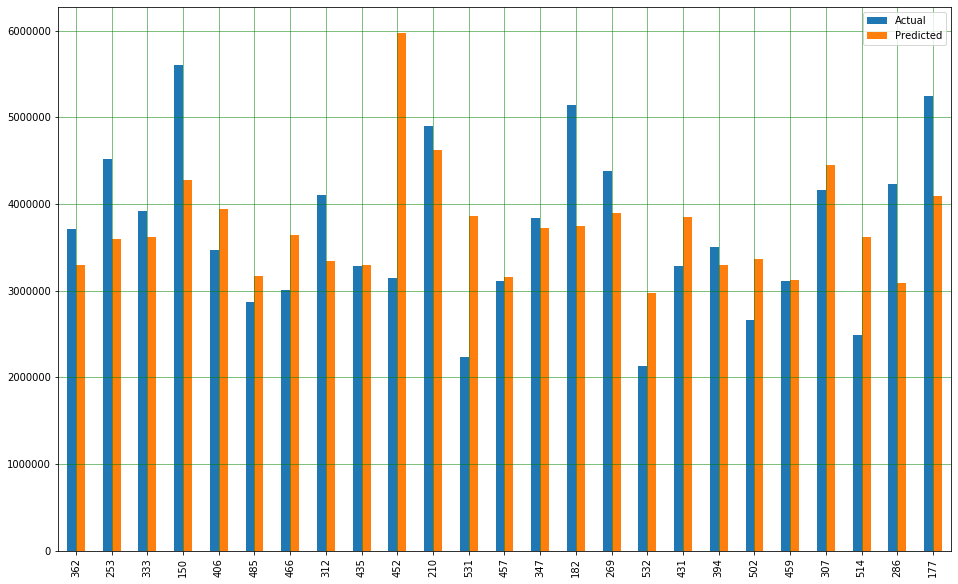

In [240]:
df2.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [241]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 781433.4095066378
Mean Squared Error: 1173206490109.4893
Root Mean Squared Error: 1083146.569079868
